<a href="https://www.kaggle.com/code/lalit7881/e-challan-india-r-0-9961?scriptVersionId=298021331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-traffic-e-challan-daily-dataset-20152026/echallan_daily_data.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/indian-traffic-e-challan-daily-dataset-20152026/echallan_daily_data.csv")

In [3]:
df.head()

,date,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
0,2015-01-01,120,29,91,588600,116860,705460,1,0,1
1,2015-01-02,162,39,123,663350,281425,944775,1,1,2
2,2015-01-03,122,34,88,596900,286950,883850,4,1,5
3,2015-01-04,116,27,89,967350,301600,1268950,3,2,5
4,2015-01-05,162,28,134,877654,103000,980654,2,0,2


In [4]:
df.tail()

,date,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
4056,2026-02-09,242251,33045,209206,399248914,72117659,471366573,13240,107,13347
4057,2026-02-10,235459,30908,204551,409291982,75390316,484682298,13867,86,13953
4058,2026-02-11,234315,31543,202772,405939091,73253910,479193001,13760,44,13804
4059,2026-02-12,185594,24278,161316,307489891,54353608,361843499,8896,16,8912
4060,2026-02-13,5990,81,5909,16886196,113550,16999746,30,0,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             4061 non-null   object
 1   totalChallan     4061 non-null   int64 
 2   disposedChallan  4061 non-null   int64 
 3   pendingChallan   4061 non-null   int64 
 4   pendingAmount    4061 non-null   int64 
 5   disposedAmount   4061 non-null   int64 
 6   totalAmount      4061 non-null   int64 
 7   pendingCourt     4061 non-null   int64 
 8   disposedCourt    4061 non-null   int64 
 9   totalCourt       4061 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 317.4+ KB


In [6]:
df.describe()

,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
count,4061.000000,4061.000000,4061.000000,4.061000e+03,4.061000e+03,4.061000e+03,4061.000000,4061.000000,4061.000000
mean,102564.295986,39190.895100,63373.400886,9.998178e+07,5.655994e+07,1.565417e+08,31538.348190,5563.763113,37102.111303
std,94274.309905,30766.668065,69079.820831,1.295082e+08,6.258393e+07,1.719233e+08,34442.072462,4879.257000,37600.288253
min,10.000000,6.000000,3.000000,2.040000e+04,6.700000e+03,5.440000e+04,0.000000,0.000000,0.000000
25%,1864.000000,1032.000000,1131.000000,1.765850e+06,5.127580e+06,7.183220e+06,843.000000,119.000000,945.000000
50%,104931.000000,47012.000000,53038.000000,5.541961e+07,5.496822e+07,1.055297e+08,23338.000000,6332.000000,31606.000000
75%,174420.000000,67133.000000,102064.000000,1.658786e+08,9.343013e+07,2.700863e+08,54761.000000,9851.000000,65373.000000
max,332710.000000,96645.000000,280588.000000,5.659961e+08,2.071116e+09,2.147021e+09,136032.000000,15910.000000,146748.000000


In [7]:
df.dtypes

date               object
totalChallan        int64
disposedChallan     int64
pendingChallan      int64
pendingAmount       int64
disposedAmount      int64
totalAmount         int64
pendingCourt        int64
disposedCourt       int64
totalCourt          int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             4061 non-null   object
 1   totalChallan     4061 non-null   int64 
 2   disposedChallan  4061 non-null   int64 
 3   pendingChallan   4061 non-null   int64 
 4   pendingAmount    4061 non-null   int64 
 5   disposedAmount   4061 non-null   int64 
 6   totalAmount      4061 non-null   int64 
 7   pendingCourt     4061 non-null   int64 
 8   disposedCourt    4061 non-null   int64 
 9   totalCourt       4061 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 317.4+ KB


In [9]:
df.isnull().sum()

date               0
totalChallan       0
disposedChallan    0
pendingChallan     0
pendingAmount      0
disposedAmount     0
totalAmount        0
pendingCourt       0
disposedCourt      0
totalCourt         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

date               4061
totalChallan       3713
disposedChallan    3375
pendingChallan     3552
pendingAmount      4048
disposedAmount     4044
totalAmount        4057
pendingCourt       3381
disposedCourt      2699
totalCourt         3416
dtype: int64

In [12]:
df.columns

Index(['date', 'totalChallan', 'disposedChallan', 'pendingChallan',
       'pendingAmount', 'disposedAmount', 'totalAmount', 'pendingCourt',
       'disposedCourt', 'totalCourt'],
      dtype='object')

## Data visualizations

In [13]:
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values('date')

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

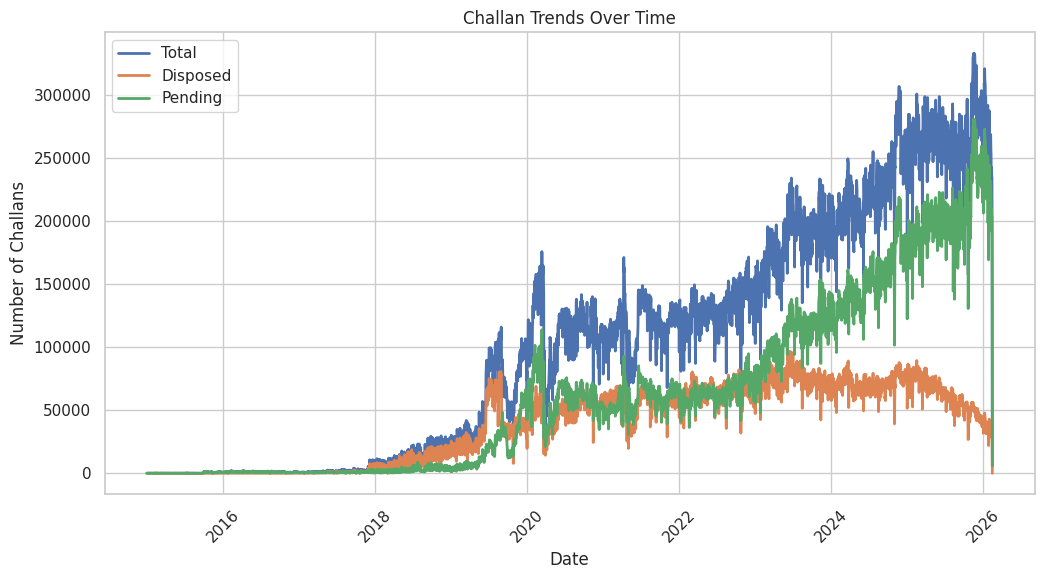

In [15]:
plt.figure()
plt.plot(df['date'], df['totalChallan'], label='Total', linewidth=2)
plt.plot(df['date'], df['disposedChallan'], label='Disposed', linewidth=2)
plt.plot(df['date'], df['pendingChallan'], label='Pending', linewidth=2)

plt.title("Challan Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Challans")
plt.legend()
plt.xticks(rotation=45)
plt.show()


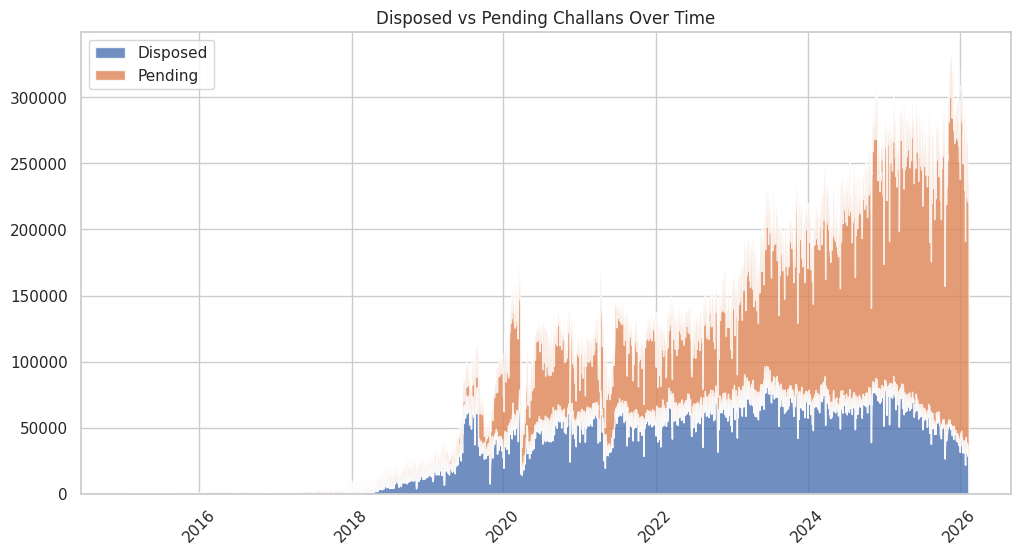

In [16]:
plt.figure()
plt.stackplot(df['date'],
              df['disposedChallan'],
              df['pendingChallan'],
              labels=['Disposed', 'Pending'],
              alpha=0.8)

plt.title("Disposed vs Pending Challans Over Time")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


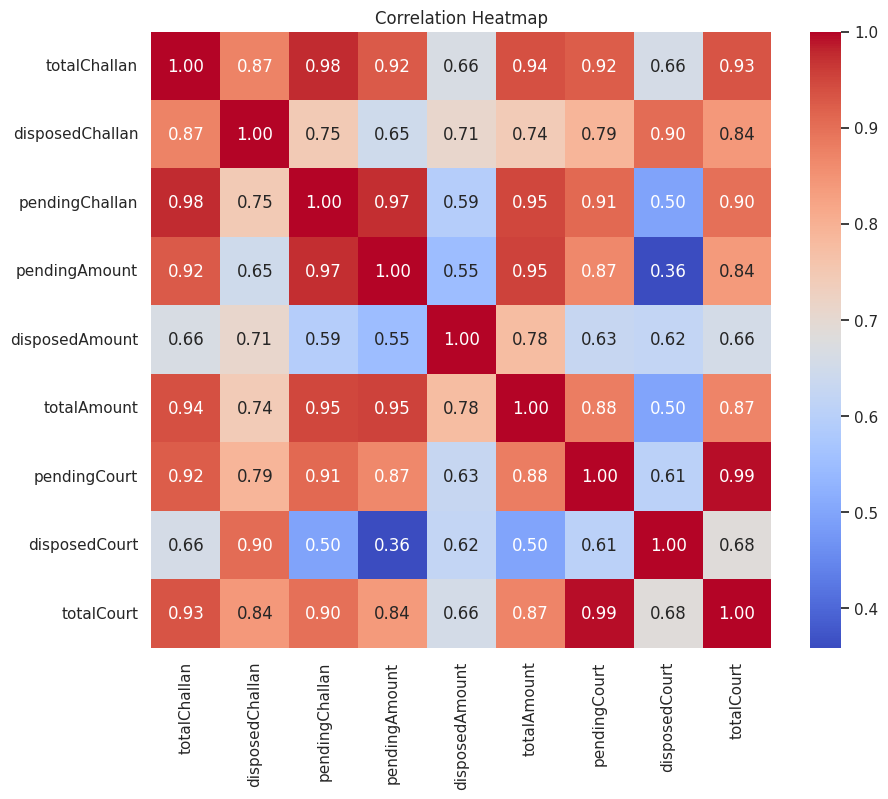

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


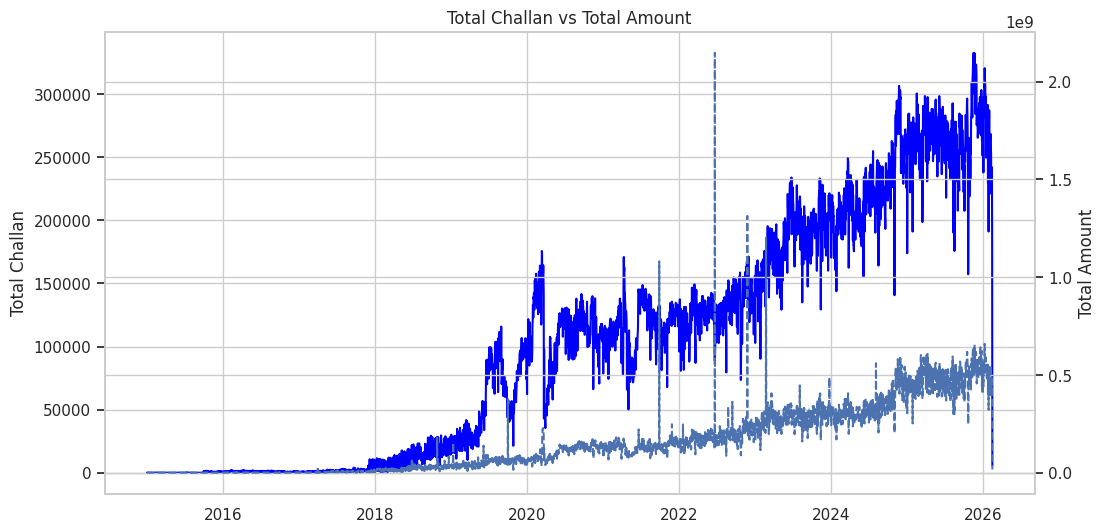

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(df['date'], df['totalChallan'], color='blue')
ax1.set_ylabel('Total Challan')

ax2 = ax1.twinx()
ax2.plot(df['date'], df['totalAmount'], linestyle='dashed')
ax2.set_ylabel('Total Amount')

plt.title("Total Challan vs Total Amount")
plt.xticks(rotation=45)
plt.show()


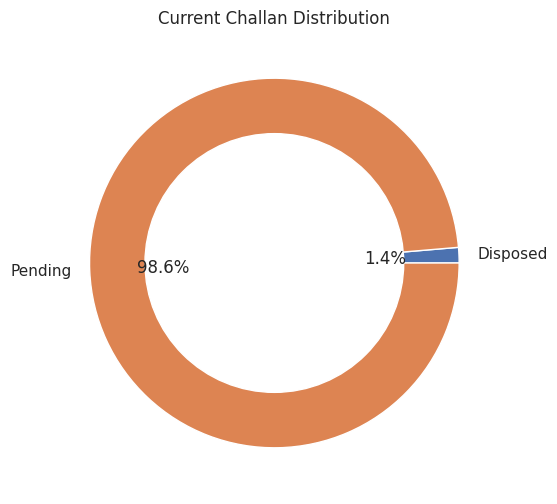

In [19]:
latest = df.iloc[-1]

values = [latest['disposedChallan'], latest['pendingChallan']]
labels = ['Disposed', 'Pending']

plt.pie(values, labels=labels, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Current Challan Distribution")
plt.show()


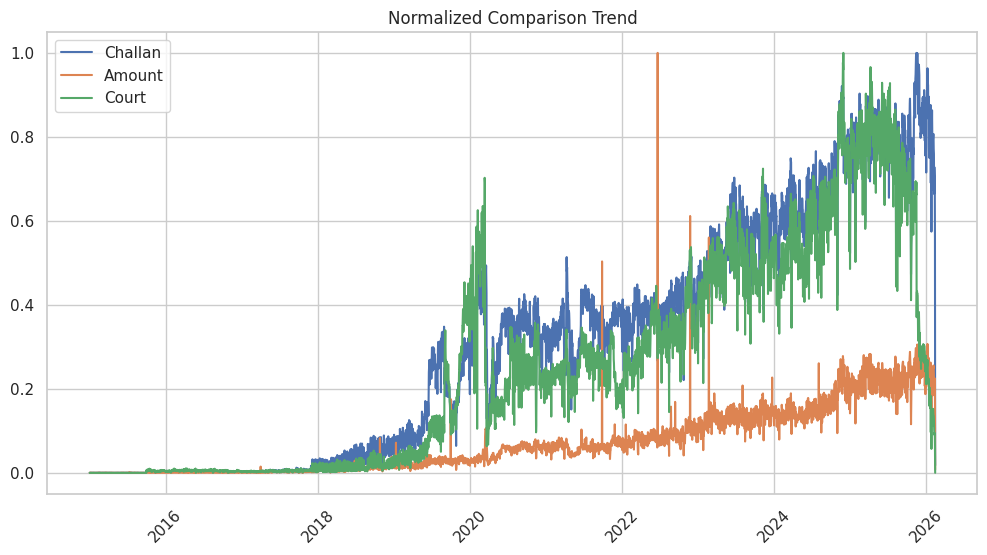

In [20]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(
    df[['totalChallan','totalAmount','totalCourt']]
)

scaled_df = pd.DataFrame(scaled_data,
                         columns=['totalChallan','totalAmount','totalCourt'])
scaled_df['date'] = df['date']

plt.figure()
plt.plot(scaled_df['date'], scaled_df['totalChallan'], label='Challan')
plt.plot(scaled_df['date'], scaled_df['totalAmount'], label='Amount')
plt.plot(scaled_df['date'], scaled_df['totalCourt'], label='Court')

plt.title("Normalized Comparison Trend")
plt.legend()
plt.xticks(rotation=45)
plt.show()


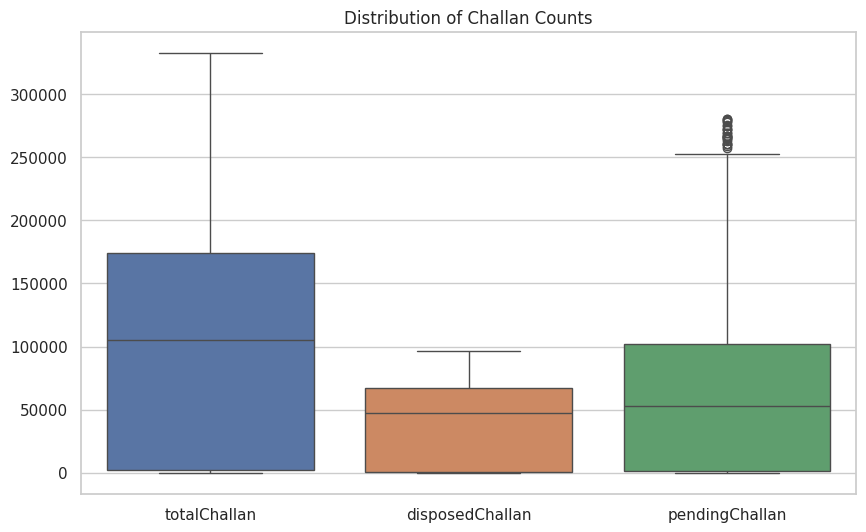

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['totalChallan','disposedChallan','pendingChallan']])
plt.title("Distribution of Challan Counts")
plt.show()


In [22]:
fig = px.line(df,
              x='date',
              y=['totalChallan','disposedChallan','pendingChallan'],
              title='Interactive Challan Trend')

fig.show()


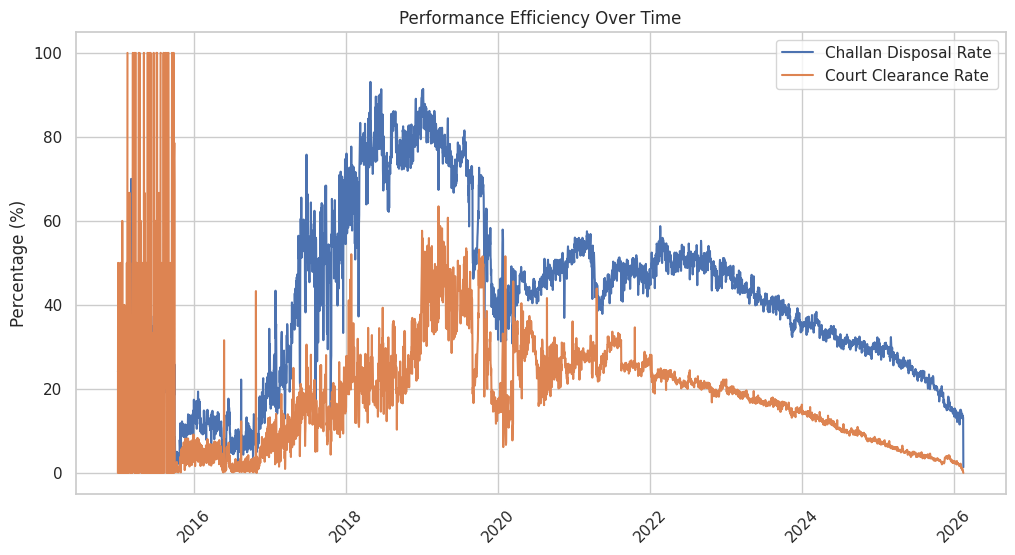

In [23]:
df['disposal_rate'] = df['disposedChallan'] / df['totalChallan'] * 100
df['court_clearance_rate'] = df['disposedCourt'] / df['totalCourt'] * 100

plt.figure()
plt.plot(df['date'], df['disposal_rate'], label='Challan Disposal Rate')
plt.plot(df['date'], df['court_clearance_rate'], label='Court Clearance Rate')

plt.title("Performance Efficiency Over Time")
plt.ylabel("Percentage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


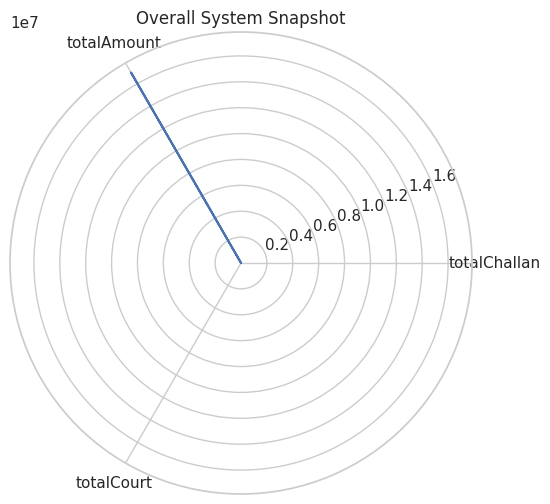

In [24]:
import numpy as np

latest = df.iloc[-1]

categories = ['totalChallan','totalAmount','totalCourt']
values = latest[categories].values

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title("Overall System Snapshot")
plt.show()


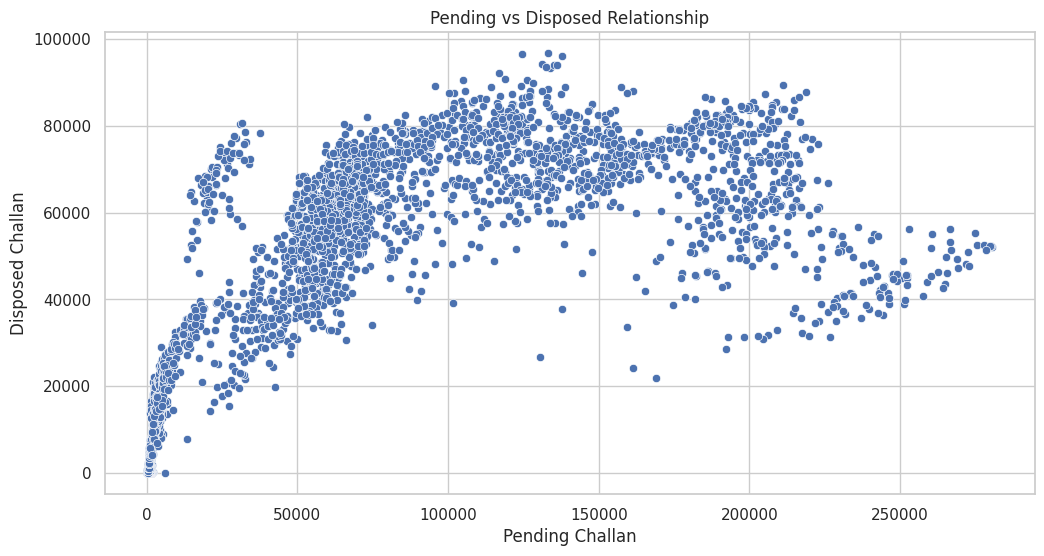

In [25]:
sns.scatterplot(
    x=df['pendingChallan'],
    y=df['disposedChallan']
)

plt.title("Pending vs Disposed Relationship")
plt.xlabel("Pending Challan")
plt.ylabel("Disposed Challan")
plt.show()


## Feature engineering

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [27]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Extract useful features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

# Drop original date column
df.drop(columns=['date'], inplace=True)


In [28]:
leakage_cols = ['disposedChallan', 'pendingChallan']


In [29]:
target = "totalChallan"

# Remove columns that directly create totalChallan
leakage_cols = ['disposedChallan', 'pendingChallan']

X = df.drop(columns=[target] + leakage_cols)
y = df[target]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
print(X_train.dtypes)


pendingAmount             int64
disposedAmount            int64
totalAmount               int64
pendingCourt              int64
disposedCourt             int64
totalCourt                int64
disposal_rate           float64
court_clearance_rate    float64
year                      int32
month                     int32
day                       int32
dayofweek                 int32
dtype: object


In [32]:
X_train = X_train.select_dtypes(include=np.number)
X_test = X_test.select_dtypes(include=np.number)


In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_features = X.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [35]:
print(X_train.isna().sum())

pendingAmount            0
disposedAmount           0
totalAmount              0
pendingCourt             0
disposedCourt            0
totalCourt               0
disposal_rate            0
court_clearance_rate    32
year                     0
month                    0
day                      0
dayofweek                0
dtype: int64


In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [39]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


In [41]:
results = []
trained_models = {}

for name, model in models.items():
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, r2])
    trained_models[name] = model


In [42]:
results_df = pd.DataFrame(results, columns=["Model", "R2"])
results_df = results_df.sort_values("R2", ascending=False)

print(results_df)


               Model        R2
7        Extra Trees  0.996127
4      Random Forest  0.995591
5  Gradient Boosting  0.993777
3      Decision Tree  0.991093
9                KNN  0.988634
2              Lasso  0.985213
0  Linear Regression  0.985213
1              Ridge  0.985211
6           AdaBoost  0.981541
8                SVR -0.000374


In [43]:
best_model_name = results_df.iloc[0]["Model"]
print("Best Model:", best_model_name)


Best Model: Extra Trees


## Thank you..pls upvote!!1